In [1]:
import numpy as np
import pandas as pd
import os.path
import cv2
import matplotlib.pyplot as plt
from os import path
import seaborn as sns

# Custom modules
from modules import voiddetect as vd
from modules import select_voidboundaries as sel
from modules import gbvoid_dataset as gbvoid
from modules import void_parameter as void_parameter

In [2]:
inputs = ['1_001', '1_002', '1_003', '1_004', '1_005', '1_006', '1_007', '1_008', '1_009', '1_010',
          '2_001', '2_002', '2_003', '2_004', '2_005', '2_006', '2_007', '2_008', '2_009',
          '3_001', '3_002', '3_003', '3_004', '3_005', '3_006', '3_007', '3_008', '3_009', '3_010',
          '4_001', '4_002', '4_003', '4_004', '4_005', '4_007', '4_008', '4_009',
          '5_001', '5_002', '5_003', '5_004', '5_005', '5_006', '5_007', '5_008', '5_009', '5_010', '5_011',
          '6_001', '6_002', '6_003', '6_004', '6_005', '6_006', '6_007', '6_008', '6_009', '6_010']

inputs= ['1_001']

for name in inputs:
    print(name)

    ### get current directory
    pa_current = os.getcwd()
    pa_parent = os.path.dirname(pa_current)

    # define paths for convenience
    pa_pic = pa_current + '/pyinputs/' + name + '.jpg'
    pa_txt = pa_current + '/pyinputs/' + name + '.txt'
    pa_selected = pa_current + '/saboutputs/' + name + '/' + 'selected.txt'

    ### Read data from text file
    gbdata = np.genfromtxt(pa_txt)
    selected_data = np.genfromtxt(pa_selected)
    width = np.amax(gbdata[:, 17])
    height = np.amax(gbdata[:, 18])
    
    ### Starting points
    staptsx = gbdata[:, 15]
    staptsy = gbdata[:, 16]
    #### Ending points
    endptsx = gbdata[:, 17]
    endptsy = gbdata[:, 18]
    mis_angle = gbdata[:,6]
    # Find dimensions for picture
    width = np.amax(gbdata[:, 17])
    height = np.amax(gbdata[:, 18]) 
        
    # define maximum void area as a multiple of average grain size (last number is factor of multiplication)
    maxarea = width * height / np.amax(gbdata[:, 20]) * 2.5

    ### run voiddetect module and return centers and radii of detected voids
    centers, radii, vheight, voidimage, drawing = vd.findvoid(pa_pic, name, maxarea)

    ### Select boundaries in void vicinity
    selected = sel.selgb(gbdata, centers, radii)
    #print('From Selected function:')
    #print(selected_data)
    #print('----------')
    #print('From Selected txt:')
    #print(selected)

1_001


In [10]:
inputs= ['1_001']

columns_void=['phi1_right','PHI_right','phi2_right','phi1_left','PHI_left','phi2_left',
         'Misorientation Angle','Mis. X in Right Hand Grain','Mis. Y in Right Hand Grain', 'Mis. Z in Right Hand Grain',
         'Mis. X in Left Hand Grain','Mis. Y in Left Hand Grain','Mis. Z in Left Hand Grain',
         'Lenght','Trace', 'X start', 'Y start', 'X end','Y end','ID Right Grain', 'ID Left Grain', 'Sigma Value','Void','Void Parameter']

columns_drop=['Mis. X in Right Hand Grain', 'Mis. Y in Right Hand Grain', 'Mis. Z in Right Hand Grain', 
              'ID Right Grain','ID Left Grain', 'Mis. X in Left Hand Grain','Mis. Y in Left Hand Grain','Mis. Z in Left Hand Grain']

# Collect all txt data
data=[]
for name in inputs:
    void_dataset_temp = gbvoid.gbvoid_dataset(name)
    data.append(void_dataset_temp)
    
void_dataset=pd.concat(data, ignore_index='True')
void_dataset.columns=columns_void

# Drop ID grain form the dataset
void_dataset=void_dataset.drop(columns_drop, axis=1)

In [5]:
# Drop Sigma value 0
void_dataset=void_dataset.loc[void_dataset['Sigma Value'] != 0.0]

In [11]:
void_dataset

,phi1_right,PHI_right,phi2_right,phi1_left,PHI_left,phi2_left,Misorientation Angle,Lenght,Trace,X start,Y start,X end,Y end,Sigma Value,Void,Void Parameter
0,0.180,0.250,6.179,5.039,0.678,1.946,55.90,2.000,180.0,0.0,1.15,2.0,1.15,156.8450,0.0,0.0
1,0.180,0.250,6.179,6.066,0.356,0.319,9.33,1.155,150.0,0.0,9.24,1.0,9.81,135.6420,0.0,0.0
2,3.511,0.204,2.663,6.066,0.356,0.319,32.61,1.155,30.0,0.0,28.87,1.0,28.29,99.1924,0.0,0.0
3,3.315,0.286,2.941,3.511,0.204,2.663,7.38,1.155,30.0,0.0,56.58,1.0,56.00,157.2130,0.0,0.0
4,0.204,0.220,6.190,2.959,0.506,3.541,41.18,1.155,150.0,0.0,81.98,1.0,82.56,136.0330,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,3.644,0.169,3.243,1.614,0.255,4.844,31.20,2.000,180.0,997.0,158.77,999.0,158.77,0.0000,0.0,0.0
3930,2.997,0.627,3.379,0.329,0.757,6.023,14.35,4.000,60.0,997.0,291.56,999.0,288.10,0.0000,0.0,0.0
3931,0.329,0.757,6.023,0.220,0.752,6.174,5.94,2.000,180.0,997.0,291.56,999.0,291.56,0.0000,0.0,0.0
3932,4.691,0.701,2.246,5.335,0.674,1.691,23.38,2.000,180.0,997.0,408.19,999.0,408.19,0.0000,0.0,0.0


In [27]:
# Divide into two dataframe, void gb and no void gb

selected_void_dataset=void_dataset.loc[void_dataset['Void Parameter'] != 0.0]
selected_novoid_dataset=void_dataset.loc[void_dataset['Void Parameter'] == 0.0]

In [28]:
selected_void_dataset

,phi1_right,PHI_right,phi2_right,phi1_left,PHI_left,phi2_left,Misorientation Angle,Lenght,Trace,X start,Y start,X end,Y end,Sigma Value,Void,Void Parameter
305,2.403,0.369,4.287,0.078,0.473,5.957,54.94,18.583,23.8,37.0,643.75,54.0,636.24,154.649,1.0,1.0
341,5.850,0.894,0.879,0.078,0.473,5.957,53.08,8.327,136.1,46.0,622.38,52.0,628.16,152.159,1.0,1.0
356,0.078,0.473,5.957,5.587,0.991,0.932,54.49,8.327,103.9,52.0,628.16,54.0,636.24,111.652,1.0,0.8
357,5.587,0.991,0.932,5.850,0.894,0.879,14.63,3.055,10.9,52.0,628.16,55.0,627.58,115.499,1.0,-1.0
365,5.587,0.991,0.932,2.403,0.369,4.287,43.47,3.464,150.0,54.0,636.24,57.0,637.97,154.060,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,1.093,0.124,5.193,2.630,0.139,3.931,18.49,1.155,150.0,932.0,473.43,933.0,474.00,0.000,1.0,-1.0
3677,0.216,0.258,6.227,2.630,0.139,3.931,22.20,3.464,90.0,932.0,473.43,932.0,476.89,0.000,1.0,-1.0
3695,5.433,0.754,1.482,2.326,0.420,4.499,25.36,1.155,90.0,935.0,470.54,935.0,471.70,0.000,1.0,0.9
3696,2.326,0.420,4.499,0.586,0.438,5.592,48.36,17.776,43.0,935.0,470.54,948.0,458.42,0.000,1.0,-1.0


/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


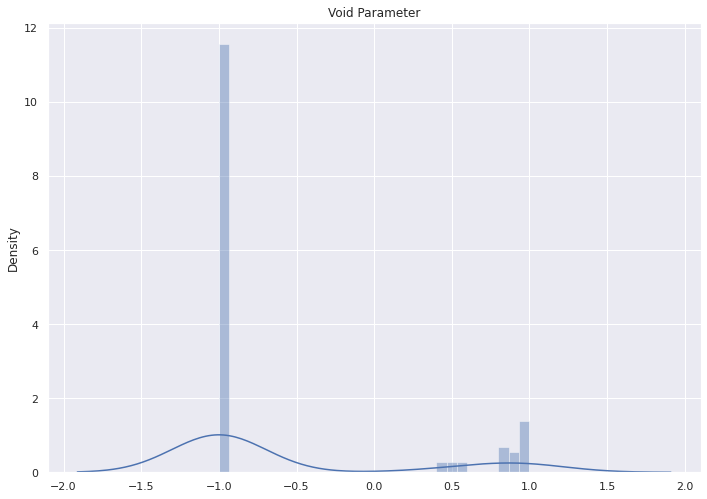

In [17]:
# Void Parameter
sns.set(rc={'figure.figsize':(11.7,8.27)},)
plt.title('Void Parameter')
sns.distplot(selected_void_dataset[['Void Parameter']],bins=30);

In [30]:
selected_void_dataset.loc[selected_void_dataset['Void Parameter']!=-1]

,phi1_right,PHI_right,phi2_right,phi1_left,PHI_left,phi2_left,Misorientation Angle,Lenght,Trace,X start,Y start,X end,Y end,Sigma Value,Void,Void Parameter
305,2.403,0.369,4.287,0.078,0.473,5.957,54.94,18.583,23.8,37.0,643.75,54.0,636.24,154.649,1.0,1.0
341,5.850,0.894,0.879,0.078,0.473,5.957,53.08,8.327,136.1,46.0,622.38,52.0,628.16,152.159,1.0,1.0
356,0.078,0.473,5.957,5.587,0.991,0.932,54.49,8.327,103.9,52.0,628.16,54.0,636.24,111.652,1.0,0.8
365,5.587,0.991,0.932,2.403,0.369,4.287,43.47,3.464,150.0,54.0,636.24,57.0,637.97,154.060,1.0,1.0
431,5.850,0.894,0.879,2.403,0.369,4.287,49.55,11.719,159.8,72.0,646.63,83.0,650.67,151.921,1.0,1.0
2153,2.275,0.254,3.992,1.101,0.601,5.482,38.32,2.309,150.0,526.0,770.19,528.0,771.34,0.000,1.0,1.0
2473,0.393,0.594,6.257,0.442,0.692,5.906,18.75,27.495,169.1,606.0,503.45,633.0,508.65,0.000,1.0,0.9
2576,3.409,0.513,3.053,3.720,0.773,2.803,18.18,26.153,143.4,642.0,823.30,663.0,838.89,0.000,1.0,0.8
2649,3.979,0.518,2.804,5.292,0.431,0.394,38.51,23.065,175.7,661.0,453.22,684.0,454.95,0.000,1.0,0.8
2653,3.409,0.513,3.053,6.091,0.243,0.266,42.97,23.180,7.2,663.0,838.89,686.0,836.00,0.000,1.0,0.5


/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


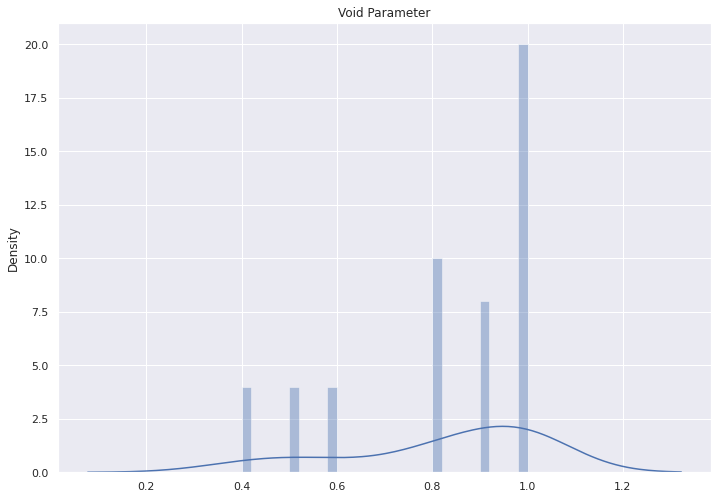

In [32]:
# Void Parameter - Dropping -1 Values
red_selected_void_dataset=selected_void_dataset.loc[selected_void_dataset['Void Parameter'] != -1.0]
sns.set(rc={'figure.figsize':(11.7,8.27)},)
plt.title('Void Parameter')
sns.distplot(red_selected_void_dataset[['Void Parameter']],bins=30);

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)},)
plt.title('Sigma value')
sns.distplot(selected_void_dataset[['Void Parameter Value']],bins=30, label="Void Grain Boundary");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Trace angle', bbox_inches='tight')

In [19]:
selected_void_dataset=void_dataset.loc[void_dataset['Void'] == 1.0]
selected_novoid_dataset=void_dataset.loc[void_dataset['Void'] == 0.0]

# Drop Void feature form the selected dataset
selected_void_dataset=selected_void_dataset.drop(['Void'], axis=1)
selected_novoid_dataset=selected_novoid_dataset.drop(['Void'], axis=1)

/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


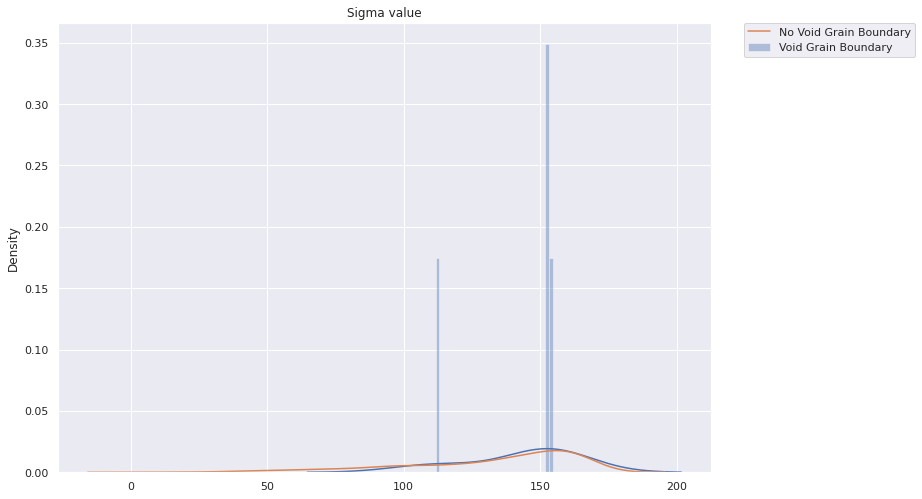

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)},)
plt.title('Sigma value')
sns.distplot(selected_void_dataset[['Sigma Value']],bins=30, label="Void Grain Boundary");
sns.distplot(selected_novoid_dataset[['Sigma Value']], hist=False, label="No Void Grain Boundary");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Trace angle', bbox_inches='tight')

In [7]:
void_dataset.groupby('Void').mean()

,phi1_right,PHI_right,phi2_right,phi1_left,PHI_left,phi2_left,Misorientation Angle,Lenght,Trace,X start,Y start,X end,Y end,Sigma Value,Void Parameter
Void,,,,,,,,,,,,,,,
0.0,3.090531,0.566250,3.277698,3.066767,0.557284,3.266307,39.877265,13.910276,93.425326,55.584660,510.630767,65.047757,511.654226,131.826223,0.000000
1.0,4.225833,0.768667,2.311000,2.733167,0.594833,3.716500,45.026667,8.912500,97.416667,52.166667,634.220000,59.166667,636.143333,139.990000,0.633333


AttributeError: 'BarContainer' object has no attribute 'set_facecolor'

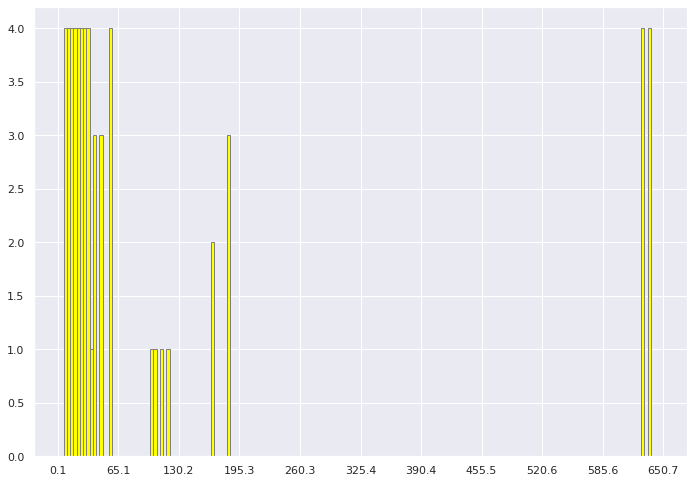

In [21]:
from matplotlib.ticker import FormatStrFormatter

data = selected_void_dataset
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data, facecolor='yellow', edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(data, [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('red')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.show()

In [24]:
sigma=void_dataset['Sigma Value']
miso=void_dataset['Misorientation Angle']

AttributeError: 'Rectangle' object has no property 'normed'

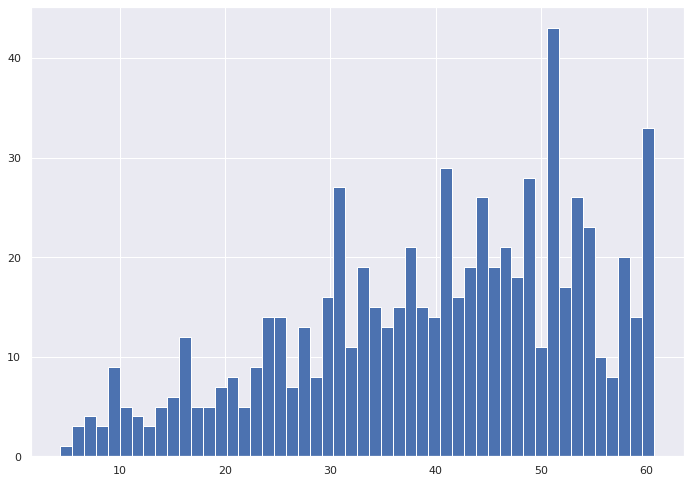

In [28]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = miso

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = sigma
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Misorientation Angle')
plt.ylabel('Sigma Value')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()


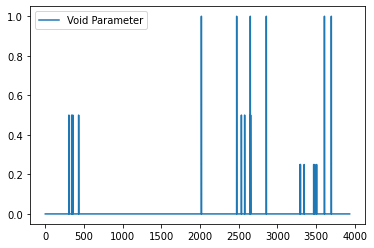

In [32]:
void_dataset.plot(y=['Void Parameter'])
plt.show()

In [ ]:
selected_void_dataset['Mid point'] = (df_obj['Marks'] / df_obj['Total']) * 100

In [ ]:
centers, radii, vheight, voidimage, drawing = vd.findvoid(pa_pic, name, maxarea)
selected = sel.selgb(gbdata, centers, radii)